In [56]:
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
import seaborn as sns
# load the image
image = Image.open('orange.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(500, 500, 4)
<class 'PIL.Image.Image'>
RGBA
(500, 500)


In [18]:
def imagedata(file):
    image = Image.open(file)
    data = asarray(image)
    R = []
    G = []
    B = []
    for i in data:
        for j in i:
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])
    rgb = pd.DataFrame([R,G,B]).transpose()
    rgb.columns = ['Red','Green','Blue']
    return rgb

In [3]:
# creating list for RGB values
R = []
G = []
B = []
# iterating through data and adding values into respective list
for i in data:
    for j in i:
        R.append(j[0])
        G.append(j[1])
        B.append(j[2])
rgb = pd.DataFrame([R,G,B]).transpose()
rgb.columns = ['Red','Green','Blue']
rgb

,Red,Green,Blue
0,215,113,105
1,228,114,99
2,215,122,94
3,226,117,69
4,227,118,71
...,...,...,...
249995,207,126,85
249996,217,122,73
249997,218,125,77
249998,219,124,75


In [4]:
N = 250000
#red_prob = rgb['Red'].value_counts()/N
#green_prob = rgb['Green'].value_counts()/N
#blue_prob = rgb['Blue'].value_counts()/N

In [5]:
def entropy(x):
    H = -np.sum(x*np.log10(x))
    return H

In [121]:
def relative_condent(C, D, rgb):
    cd_joint = rgb[[C,D]].value_counts()/N
    cd_joint_df = cd_joint.sort_index().to_frame().reset_index()
    c_prob = rgb[C].value_counts()/N
    d_prob = rgb[D].value_counts()/N
    d_dict = d_prob.sort_index().to_frame().to_dict()[D]
    cd_joint_df['probD'] = cd_joint_df[D].apply(lambda x: d_dict.get(x))
    cd_joint_df.columns = [C,D,'Joint','ProbD']
    cd_joint_df['CondProb'] = cd_joint_df['Joint']/cd_joint_df['ProbD']
    hcd = -np.sum(cd_joint_df['Joint']*np.log10(cd_joint_df['CondProb']))
    hrcd = hcd/entropy(c_prob)
    return hrcd

In [20]:
orange_rgb = imagedata('orange.png')

In [128]:
import matplotlib.pyplot as plt

In [67]:
def colors_hr(image_rgb):
    rg = relative_condent('Red','Green', image_rgb)
    rb = relative_condent('Red','Blue', image_rgb)
    gr = relative_condent('Green', 'Red', image_rgb)
    gb = relative_condent('Green', 'Blue', image_rgb)
    br = relative_condent('Blue', 'Red', image_rgb)
    bg = relative_condent('Blue','Green', image_rgb)
    hr_matrix = pd.DataFrame([[0, rg, rb], [gr, 0, gb], [br, bg, 0]])
    hr_matrix.columns = ['Red','Green','Blue']
    hr_matrix.index = ['Red','Green','Blue']
    heatmap = sns.heatmap(hr_matrix, annot = True, fmt='.3', 
                          cmap='Greens', linewidths=1, linecolor='black')
    return heatmap

Text(0.5, 1.0, 'Orange Marilyn')

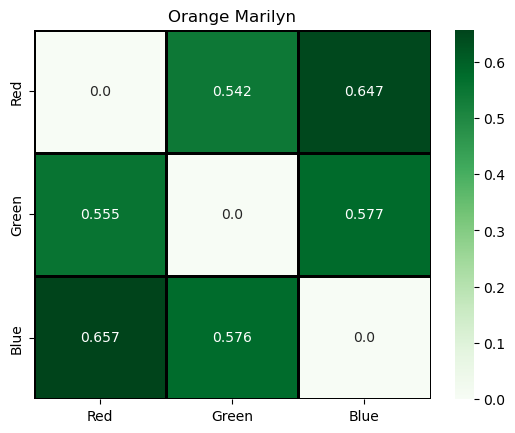

In [129]:
colors_hr(orange_rgb)
plt.title('Orange Marilyn')

In [58]:
# egg blue, red, turq
blue = imagedata('blue.png')

Text(0.5, 1.0, 'Blue Marilyn')

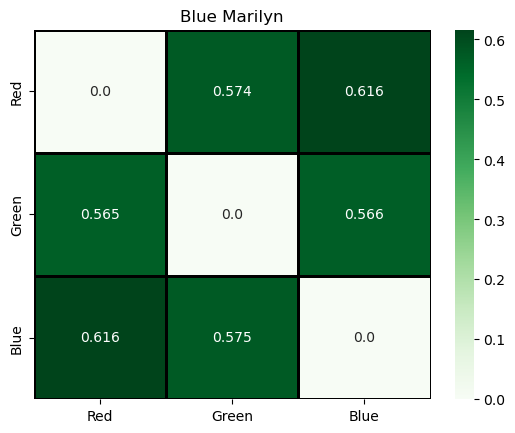

In [130]:
colors_hr(blue)
plt.title('Blue Marilyn')

In [60]:
eggblue = imagedata('eggblue.png')

Text(0.5, 1.0, 'Egg Blue Marilyn')

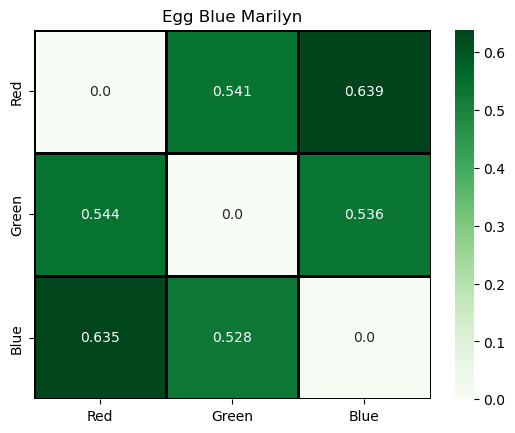

In [131]:
colors_hr(eggblue)
plt.title('Egg Blue Marilyn')

In [62]:
red = imagedata('red.png')

Text(0.5, 1.0, 'Red Marilyn')

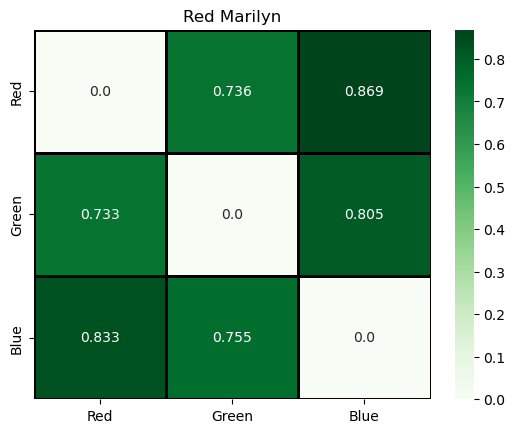

In [132]:
colors_hr(red)
plt.title('Red Marilyn')

In [64]:
turq = imagedata('turq.png')

Text(0.5, 1.0, 'Turquoise Marilyn')

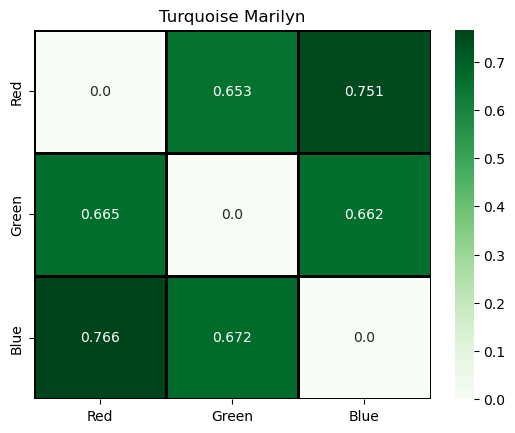

In [133]:
colors_hr(turq)
plt.title('Turquoise Marilyn')